# 0905 과제
### 나라별 자주 사용되는 알파벳이 다르다 => 분류기로 식별하자!

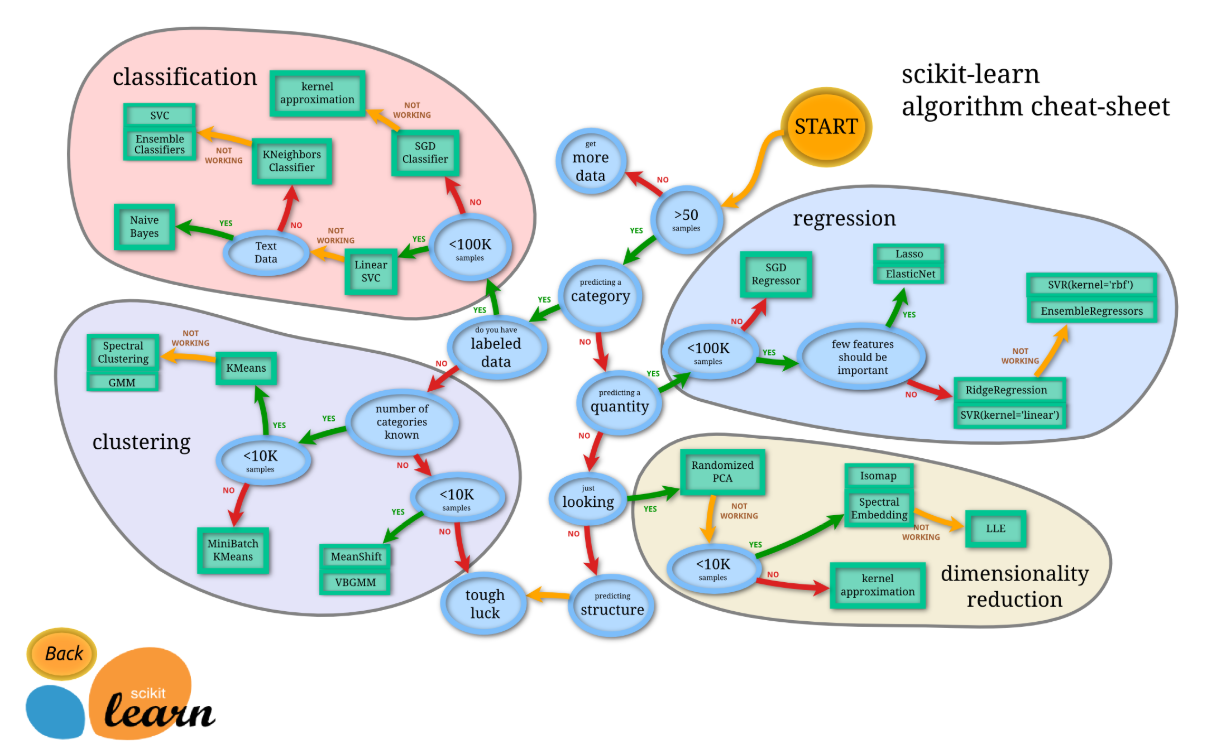

In [2]:
from IPython.display import Image 
Image("./data/img.png")

---
## [1] 전처리 : 나라별 알파벳 패턴 분석

In [1]:
# 라이브러리 import
import sys              # 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어할 수 있는 모듈
import urllib           # 
import os.path, glob    # 환경 변수나 디렉토리 등 OS 자원을 제어
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
# 디렉토리 변수 지정
path_train = './data./train/'
path_test = './data./test/'

알파벳 별 빈도수 비율 반환 함수 정의

In [5]:
def checkFreq(fname, path) :
    # 라벨로 사용할 lang 변수는 파일 이름을 -를 구분으로 앞에 있는 단어를 사용한다
    lang = fname.split('-'[0])

    # 해당 파일을 읽어온다
    with open(path+fname+'.txt', mode='r', encoding='utf-8') as f:
        text = f.read()
    
    # 대문자는 필요없으니 모두 소문자로 만든다.
    text.lower()

    # 26개의 알파벳의 문자별 등장 횟수를 저장할 리스트 생성
    cnt = [0 for n in range(0,26)]

    # 각각의 text에서
    # ord 함수 : 문자를 숫자로 바꿔줌
    for char in text:
        # 소문자 알파벳인 경우에만
        if ord('a') <= ord(char) <= ord('z') :
            # 해당 알파벳의 등장 시 해당 횟수를 증가
            cnt[ord(char)-ord('a')] += 1
    
    # 빈도수를 전체 대비 비중으로 변환
    freq = list(map(lambda char : char/sum(cnt), cnt))

    # train으로 사용할 freq와 target으로 사용할 lang 반환
    return (freq, lang)

전체 데이터 저장

In [11]:
# freq와 lang을 저장할 리스트
data_train_freq = []
data_train_lang = []

data_test_freq = []
data_test_lang = []

# 훈련 데이터 저장
# glob 라이브러리로 './data./train/' 안에 있는 '.txt' 파일 경로 모두 저장.
train_files_data = glob.blog(path_train + '*.txt')
# 파일은 './data./train\\en-1.txt' 처럼 저장됨

# 전체 files_data에서
for f in train_files_data :
    # 각 파일의 필요한 이름을 받아와서
    fname = f.split('\\')[1].split('.txt')[0]
    # 알파벳 별 빈도수 비율 반환 함수 실행



In [9]:
files_data = glob.glob(path_train + '*.txt')

In [10]:
files_data

['./data./train\\en-1.txt',
 './data./train\\en-2.txt',
 './data./train\\en-3.txt',
 './data./train\\en-4.txt',
 './data./train\\en-5.txt',
 './data./train\\fr-10.txt',
 './data./train\\fr-6.txt',
 './data./train\\fr-7.txt',
 './data./train\\fr-8.txt',
 './data./train\\fr-9.txt',
 './data./train\\id-11.txt',
 './data./train\\id-12.txt',
 './data./train\\id-13.txt',
 './data./train\\id-14.txt',
 './data./train\\id-15.txt',
 './data./train\\tl-16.txt',
 './data./train\\tl-17.txt',
 './data./train\\tl-18.txt',
 './data./train\\tl-19.txt',
 './data./train\\tl-20.txt']

---
## [2] 학습 : 교차 검증 적용